# An Efficient Algorithm to Exploit Arbitrage Opportunities in Crypto Markets

The crypto market is still inefficient. Cryptoassets have different rates on different exchanges. The big question is how we can profit from that inefficiency. One approach is making transactions between exchanges, but we realize that it wouldn’t work, because transactions take too long. If we buy a cryptoasset on one exchange, by the time we can sell it on another, the price difference may no longer exist. For a discussion of this problem, see [What I Have Learned from My Arbitrage Experiences with Cryptoassets](https://blog.coinfabrik.com/what-i-have-learned-from-my-arbitrage-experiences-with-cryptoassets/).

An efficient approach consists in using what I call _virtual transactions_. A virtual transaction consist in buying a pair on one exchange and simultaneously selling this pair in another exchange. In order to do an arbitrage using virtual transactions it is necessary to have funded wallets before _profitable oscillations_ events. A profitable oscillation is an event in which the price difference for a given pair between two exchanges allows you to make a profit after performing a virtual transaction at the time of the event and performing the opposite operation once the event disappears and the price difference returns to average values.

Put in mathematical terms, in an oscillation event it happens that:

   \begin{equation*} N \left\{ \left[ bid_1^I (1-fee_1) - ask_2^I (1+fee_2) \right] + \left[ bid_2^{II} (1-fee_2) - ask_1^{II} (1+fee_1) \right] \right \} \end{equation*}

where N is the amount of assets you are exchanging, ask and bid refers to the values you would pay and receive to exchange that assets, respectively, the sub-indices 1 and 2 refers to the two exchanges and the supra-indices I and II refers to the time step of your operation. This method is a statistical arbitrage method known as pair trading and works using [co-integrated](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) pairs. For a deeper look into pair trading algorithms, see [Introduction to Pairs Trading](https://www.quantopian.com/lectures/introduction-to-pairs-trading). The arbitrage method in which we only monitor for price differences is just a particular case of this method, considering that the average price difference is zero.

Now, unless the exchanges allow opening and closing positions (_margin trading_ tool) using a stable currency as collateral, this approach has its risks, since it is necessary to hold cryptoassets. Although there is a profit due to arbitrage, there may also be a devaluation of our capital due to the market volatility. On the other hand, it is also necessary to hold a [quote](https://www.investopedia.com/terms/q/quotecurrency.asp) currency buffer in each exchange to cover possible future price fluctuations.

Some useful tips you can consider before implementing your trading bot:

- Profitable oscillations events should be exploited as quickly as possible. Use market type orders and not limit type orders.
- Whenever you can use leverage, do it! Some exchanges like Bitfinex, Huobi, Okex, Kraken and Bitmex allow you to execute your long/short positions with 2x, 3x and even 100x, which allows you to get a higher ROI on the invested capital.
- Even better, using margin trading, in some exchanges you can operate keeping your collateral in [stable coins](https://www.investopedia.com/terms/q/quotecurrency.asp), avoiding the volatility risk, and so using a [market-neutral](https://www.investopedia.com/terms/q/quotecurrency.asp) strategy.

I would like to finish this article sharing the log of the operations in the pair XTZ/BTC using a statistical arbitrage method between the exchanges [Gateio](https://www.gate.io/) and [Hitbtc](https://hitbtc.com/exchange), from 28th August to 23th September 2018. Yo can download the log using [this link](https://hitbtc.com/exchange). Initially, I’ve deposited 0.2 BTC in each exchange, and I have bought some XTZ in Hitbtc (using exactly 0.15384 BTC). I left some free bitcoins as a buffer (~30%) to cover the price volatility in future trades. Each step of the log starts with Opening trades and followed by Closing trades. The Opening trades are composed by a XTZ purchase on Gateio and a XTZ sale on Hitbtc, and the Closing trades are composed by a XTZ sale on Gateio and a XTZ purchase on Hitbtc. The amount N of XTZ traded in each exchange inside the same step remains fixed, but between steps it can vary a bit, trying to always keep the same amount of bitcoins invested. All orders are executed using market type. The ROI of the operations in the period considered is 4.2% in BTC over the whole initial capital invested, without considering XTZ valuation changes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
profit = np.matrix([
    [pd.to_datetime('2018-08-28 00:00:00'), 0],
    [pd.to_datetime('2018-08-29 13:03:28'), 0.00173474],
    [pd.to_datetime('2018-09-04 04:01:14'), 0.00112256],
    [pd.to_datetime('2018-09-05 21:51:12'), 0.00102374],
    [pd.to_datetime('2018-09-08 09:58:56'), 0.00111541],
    [pd.to_datetime('2018-09-11 04:35:22'), 0.00107421],
    [pd.to_datetime('2018-09-12 01:28:48'), 0.00138682],
    [pd.to_datetime('2018-09-15 00:43:44'), 0.00102770],
    [pd.to_datetime('2018-09-16 02:43:28'), 0.00292956],
    [pd.to_datetime('2018-09-17 22:13:50'), 0.00141793],
    [pd.to_datetime('2018-09-20 13:44:10'), 0.00132793],
    [pd.to_datetime('2018-09-22 15:42:04'), 0.00274745]
])
df = pd.DataFrame(profit, columns = ["Time", "Profit [BTC]"])
df = df.set_index("Time")

Text(0.5,1,'Acumulated Profit with Statistical Arbitrage Method \n using XTZ/BTC Between Gateio and Hitbtc')

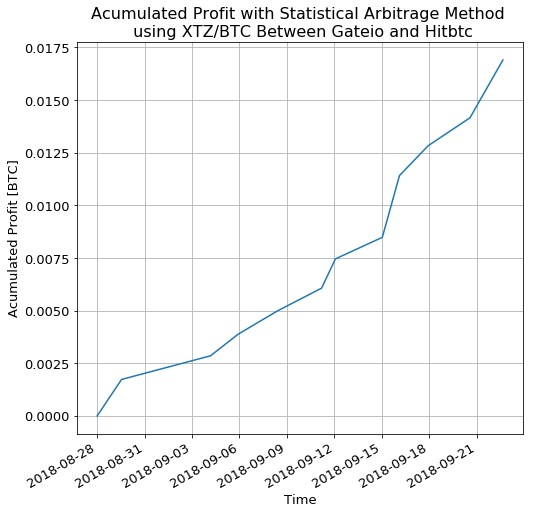

In [7]:
df["Acumulated profit [BTC]"] = df["Profit [BTC]"].cumsum()
ax  = df["Acumulated profit [BTC]"].plot(figsize=(8,8), 
                                   grid = True,
                                   legend = False,
                                   fontsize = 13)
ax.set_xlabel("Time", fontsize=13)
ax.set_ylabel("Acumulated Profit [BTC]", fontsize=13)
plt.title("Acumulated Profit with Statistical Arbitrage Method \n using XTZ/BTC Between Gateio and Hitbtc", fontsize=16)